## Observations and Insights

### Analysis 

* Observation 1: There are four treatment types we were considered 'promising treatments': Capomulin, Ramicane, Infubinol, and Ceftamin. When we look at our first summary table we can see that the variance is highest to lowest: Ramicane, Capomulin, Ceftamin, Infubinol. You can see this ranking visually in the box plots with the sizes of the boxes. Respectivley, you can see that the standard deviation also increases as the variance increases. Meaning as the tumor volumes vary more widely the distance from the mean increases for all the tumor volume data for the given treatment. Specifically, Infubinol has the most variance and highest standard deviation of the four treatments. Later on we see in the graph there is an outlier with the value 36.83290494999999 outside the outlier boundary for Infubinol that maybe contributing to the increase in variance and standard devation.


* Observation 2: We were asked to take a look at one mouse treated with Capomulin. We can observe from the line plot overtime (looking at timepoints) Mouse B128's tumor volume decreased from 45.0 to 39.9 mm3 with Capomulin treatment. From my own scatter plot generated below the line plot you can also see a strong negative correlation. This means treating Mouse B128 with Capomulin has a strong correlation decreaing tumor volume.


* Observation 3: In the last portion of the homework we were asked to calculate the correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen. The correlation coefficient was 0.84 and after examining the scatter plot we can conclude there is a strong positive relationship between mouse weight and average tumor volume for the Capomulin regimen. This means when mice in this study are treated with Capomulin theres a strong correlation that as their weight increases so does the average tumor volume.  

## Dependencies and starter code

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
# df that has a row for each mouse ID
mouse_metadata = "data/Mouse_metadata.csv"

#
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [127]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [128]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [59]:
len(mouse_metadata)

249

In [60]:
len(study_results)

1893

In [61]:
# Combine the data into a single dataset
complete_study_data = pd.merge(study_results, mouse_metadata,
                                 how='left', on='Mouse ID')
complete_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [62]:
#get rid of duplicates
complete_study_data['Mouse ID'].nunique()


249

In [63]:
#check for duplicate IDs
duplicate_mouse_ids = complete_study_data.loc[complete_study_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [64]:
complete_study_data.loc[complete_study_data["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [65]:
clean_study_data = complete_study_data[complete_study_data["Mouse ID"].isin(duplicate_mouse_ids) == False]
clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [66]:
len(clean_study_data['Mouse ID'].unique())

248

## Summary statistics

In [101]:
# Practice with Group By aggregations.

# # Groupby average of multiple columns.
# clean_study_data.groupby('Drug Regimen').mean()[['Tumor Volume (mm3)', 'Metastatic Sites']]

# # Groupby and calculate various aggregations (aggregate functions) over the same column.
# summary_table = clean_study_data.groupby('Drug Regimen').agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
# summary_table['Tumor Volume (mm3)', 'mean']

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: (Tumor Volume (mm3), mean), dtype: float64

In [92]:
#Generate a summary statistics table consisting of the 
#mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

#groupby Drug Regimen to create the data frame at the end
#measures of central tendency for tumor volume
mean_tumorvolume = clean_study_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mean_tumorvolume

median_tumorvolume = clean_study_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
mean_tumorvolume

variance_tumorvolume = clean_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
variance_tumorvolume

standard_deviation_tumorvolume = clean_study_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
standard_deviation_tumorvolume

sem_tumorvolume = clean_study_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
sem_tumorvolume


summary_df = pd.DataFrame({"Mean": mean_tumorvolume, 
                           "Median": median_tumorvolume, 
                           "Variance": variance_tumorvolume, 
                           "Standard Deviation": standard_deviation_tumorvolume,
                           "SEM": sem_tumorvolume
                          })
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar plots

In [105]:
# use value.counts() to count
drug_regimen_count = clean_study_data['Drug Regimen'].value_counts()

# #first generate a grouped df with count as drug regimen and reset it to NOT your Drug regimen index
# grouped_df = pd.DataFrame(clean_study_data.groupby(["Drug Regimen"]).count()).reset_index()
# # grouped_df

# #filter the df
# treatment_datapoints = grouped_df[["Drug Regimen", "Mouse ID"]]
# # treatment_datapoints

# #set drug regimen to index to use as labels
# treatment_datapoints = treatment_datapoints.set_index("Drug Regimen")
# treatment_datapoints

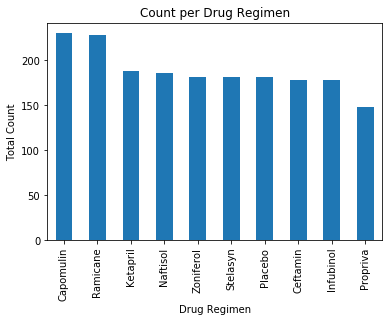

In [108]:
#plot df using pandas
drug_regimen_count.plot(kind="bar")

#title
plt.title("Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Count")
plt.show()

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

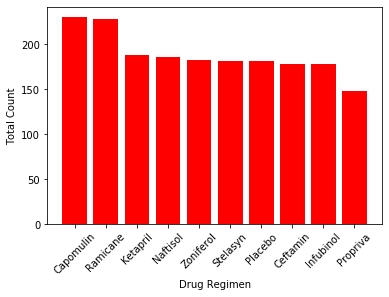

In [126]:
plt.bar(drug_regimen_count.index , drug_regimen_count.values, color='r')
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Count")
plt.show()

# x_axis = np.arange(len(treatment_datapoints))
# tick_locations = [value for value in x_axis]

# plt.figure(figsize=(20,3))
# plt.bar(x_axis, treatment_datapoints["Mouse ID"], color='r', alpha=0.5, align="center")
# plt.xticks(tick_locations, treatment_datapoints["Drug Regimen"], rotation="vertical")

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

## Pie plots

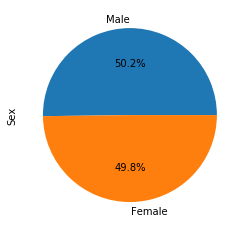

In [133]:
gender_count = mouse_metadata['Sex'].value_counts()

gender_count.plot(kind="pie",autopct='%1.1f%%')
plt.show()

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

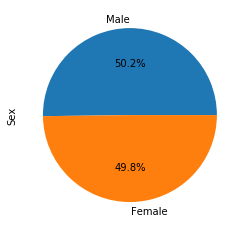

In [136]:
plt.pie(gender_count.values ,labels=gender_count.index,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [169]:
# to get first timepoint
# clean_study_data.groupby('Mouse ID').min()

# to get last timepoint
max_volume = clean_study_data.groupby('Mouse ID').max().reset_index()
max_volume
# Merge this df with the original df to get the tumor volume at the final timepoint.
merged_data = max_volume[["Mouse ID","Timepoint"]].merge(clean_study_data, on=["Mouse ID","Timepoint"], how = "left")
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [160]:
capomulin = merged_data[merged_data['Drug Regimen'] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = merged_data[merged_data['Drug Regimen'] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = merged_data[merged_data['Drug Regimen'] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = merged_data[merged_data['Drug Regimen'] == "Ceftamin"]['Tumor Volume (mm3)']



In [162]:
quartiles_capomulin = capomulin.quantile([.25,.5,.75])
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin-lowerq_capomulin

lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)
print(f"Values below {lower_bound_capomulin} could be outliers.")
print(f"Values above {upper_bound_capomulin} could be outliers.")

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [163]:
quartiles_ramicane = ramicane.quantile([.25,.5,.75])
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane-lowerq_ramicane

lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)
print(f"Values below {lower_bound_ramicane} could be outliers.")
print(f"Values above {upper_bound_ramicane} could be outliers.")

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [164]:
quartiles_infubinol = infubinol.quantile([.25,.5,.75])
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol-lowerq_infubinol

lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)
print(f"Values below {lower_bound_infubinol} could be outliers.")
print(f"Values above {upper_bound_infubinol} could be outliers.")

Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [165]:
quartiles_ceftamin = ceftamin.quantile([.25,.5,.75])
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin-lowerq_ceftamin

lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)
print(f"Values below {lower_bound_ceftamin} could be outliers.")
print(f"Values above {upper_bound_ceftamin} could be outliers.")

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

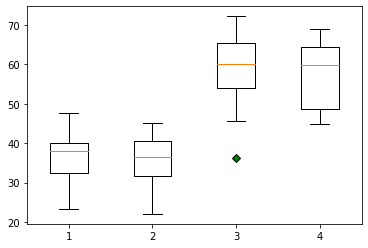

In [178]:
data = [capomulin,ramicane,infubinol,ceftamin]

green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.boxplot(data, flierprops=green_diamond)
# ax.boxplot(data, labels=  flierprops=green_diamond)

plt.show()

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [196]:
#we need a df for single mouse with only capomulin with timepoint and tumor volume

mouse_b128 = clean_study_data.loc[complete_study_data["Mouse ID"] == "b128"]
mouse_b128

# mouse_b128["Drug Regimen"]



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


In [217]:
from scipy.stats import linregress

In [218]:
mouse_b128_timepoint = mouse_b128['Timepoint']
mouse_b128_timepoint

mouse_b128_tumorvolume = mouse_b128['Tumor Volume (mm3)']
mouse_b128_tumorvolume



0       45.000000
472     45.651331
679     43.270852
719     43.784893
933     42.731552
1268    43.262145
1400    40.605335
1547    37.967644
1629    38.379726
1764    38.982878
Name: Tumor Volume (mm3), dtype: float64

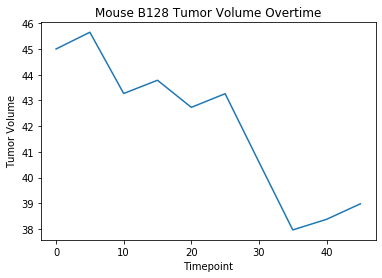

In [230]:
# you can also just reference the mouse_b128['Timepoint'] and ['Tumor Volume (mm3)'] in plt.plot

plt.plot(mouse_b128_timepoint,mouse_b128_tumorvolume)
plt.title("Mouse B128 Tumor Volume Overtime")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()

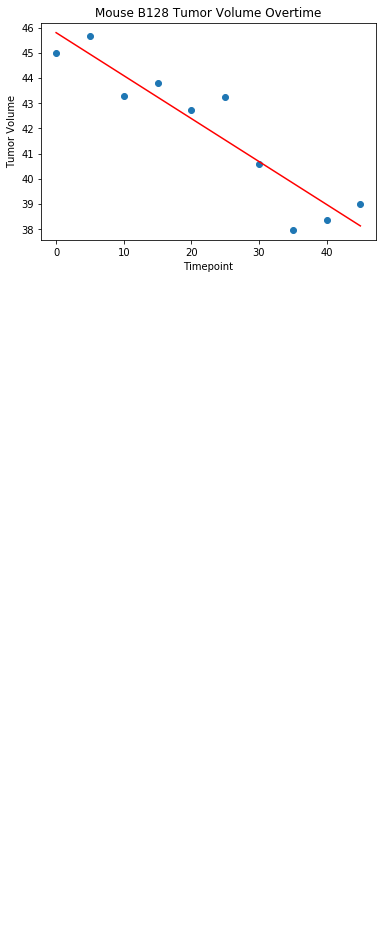

In [226]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_b128_timepoint, mouse_b128_tumorvolume)
regress_values = mouse_b128_timepoint * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(mouse_b128_timepoint,mouse_b128_tumorvolume)
plt.title("Mouse B128 Tumor Volume Overtime")
plt.plot(mouse_b128_timepoint,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()



In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

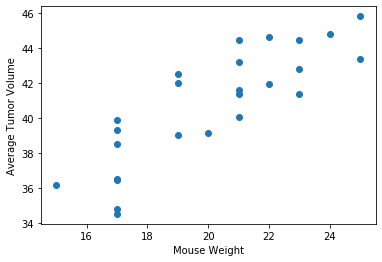

In [239]:
capomulin_data = clean_study_data[clean_study_data["Drug Regimen"] == "Capomulin"]
capomulin_data

average_tumor_volume = capomulin_data.groupby("Mouse ID").mean()[["Tumor Volume (mm3)","Weight (g)"]]
average_tumor_volume

plt.scatter(average_tumor_volume["Weight (g)"],average_tumor_volume["Tumor Volume (mm3)"])
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

In [247]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(average_tumor_volume["Weight (g)"],average_tumor_volume["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between both factors is {correlation}")

The correlation between both factors is 0.84


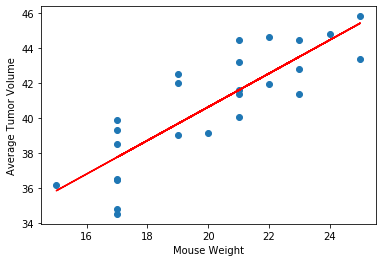

In [249]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"])
regress_values = average_tumor_volume["Weight (g)"] * slope + intercept

plt.scatter(average_tumor_volume["Weight (g)"],average_tumor_volume["Tumor Volume (mm3)"])
plt.plot(average_tumor_volume["Weight (g)"],regress_values, color='r')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()